In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

### Merging the 12 months Sales Data

In [2]:
os.getcwd()

'C:\\Users\\Dennis\\Documents\\Global Terrorism'

In [3]:
master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        master_df = master_df.append(pd.read_csv(file, parse_dates=True))
        
master_df.to_csv('Master File Sales.csv', index = False)

In [4]:
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Wrangling - checking for missing data

In [5]:
master_df_raw = master_df.copy()

nan_cols = master_df.isna().mean() * 100
# nan_cols

#dropping missing records

master_df.dropna(axis = 0, how= 'any', inplace = True)
# nan_cols

In [6]:
master_df.head()

master_df.describe(include = 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,1117830,1117830,1117830,1117830,1117830,1117830
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,2130,131418,1011312,131418,2130,2130


### Renaming Columns

In [7]:
master_df.rename(columns={'Order ID':'OrderId', 'Quantity Ordered': 'Quantity', 'Price Each': 'Price','Order Date':'OrderDate', 'Purchase Address':'PurchaseAddress'}, inplace = True)

master_df.head()

,OrderId,Product,Quantity,Price,OrderDate,PurchaseAddress
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### What was the best month for sales? How much did we earn

In [8]:
from datetime import datetime

In [9]:
master_df.dtypes

OrderId            object
Product            object
Quantity           object
Price              object
OrderDate          object
PurchaseAddress    object
dtype: object

In [20]:
master_df['month'] = master_df.OrderDate.str[:2]
master_df['month'].astype(int)

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: month, Length: 1115700, dtype: int32

### Data Cleaning

In [11]:
 ##Finding 'Or' and Delete it
    
# temp_df = master_df[master_df.OrderDate.str[:2] == 'Or']
# temp_df

In [12]:
master_df = master_df[master_df.OrderDate.str[:2] != 'Or']

In [13]:
master_df.head()

,OrderId,Product,Quantity,Price,OrderDate,PurchaseAddress
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
master_df['month'] = pd.to_numeric(master_df['month'])
master_df

,OrderId,Product,Quantity,Price,OrderDate,PurchaseAddress,Sales,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [22]:
##SALES

master_df['Price'] = pd.to_numeric(master_df.Price)
master_df['Quantity'] = pd.to_numeric(master_df.Quantity)

master_df['Sales'] = master_df['Price'] * master_df['Quantity'] 
master_df

,OrderId,Product,Quantity,Price,OrderDate,PurchaseAddress,Sales,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [ ]:
##Best month for sales

In [83]:
results1 = master_df.groupby('month').sum()['Sales']
results1

month
1     10933540.38
2     13212134.52
3     16842602.28
4     20344021.44
5     18915640.50
6     15466813.56
7     15886654.56
8     13466807.28
9     12585360.78
10    22420361.28
11    19197619.20
12    27680660.04
Name: Sales, dtype: float64

In [40]:
city = []
for item in master_df['PurchaseAddress'].str.split(','):
    city.append(item[1])
    
master_df['city'] = city
master_df

,OrderId,Product,Quantity,Price,OrderDate,PurchaseAddress,Sales,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco


In [72]:
#Identying City with most sales
results = master_df.groupby('city').sum()['Sales']
results

city
 Atlanta          16772991.48
 Austin           10917490.50
 Boston           21969852.06
 Dallas           16607852.40
 Los Angeles      32715424.80
 New York City    27985904.58
 Portland         13922943.66
 San Francisco    49573223.46
 Seattle          16486532.88
Name: Sales, dtype: float64

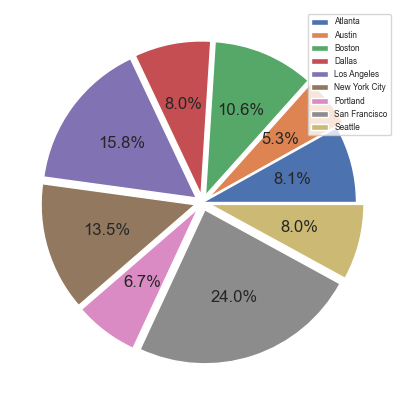

In [71]:
from numpy import mean

plt.figure(figsize=(5,5))
labels = ['Atlanta','Austin','Boston','Dallas','Los Angeles','New York City','Portland','San Francisco','Seattle']
#sns.set_theme(style="whitegrid")
plt.pie(results, explode =(0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05),autopct='%1.1f%%')
plt.legend(labels, fontsize = 6, loc='upper right')
plt.show()

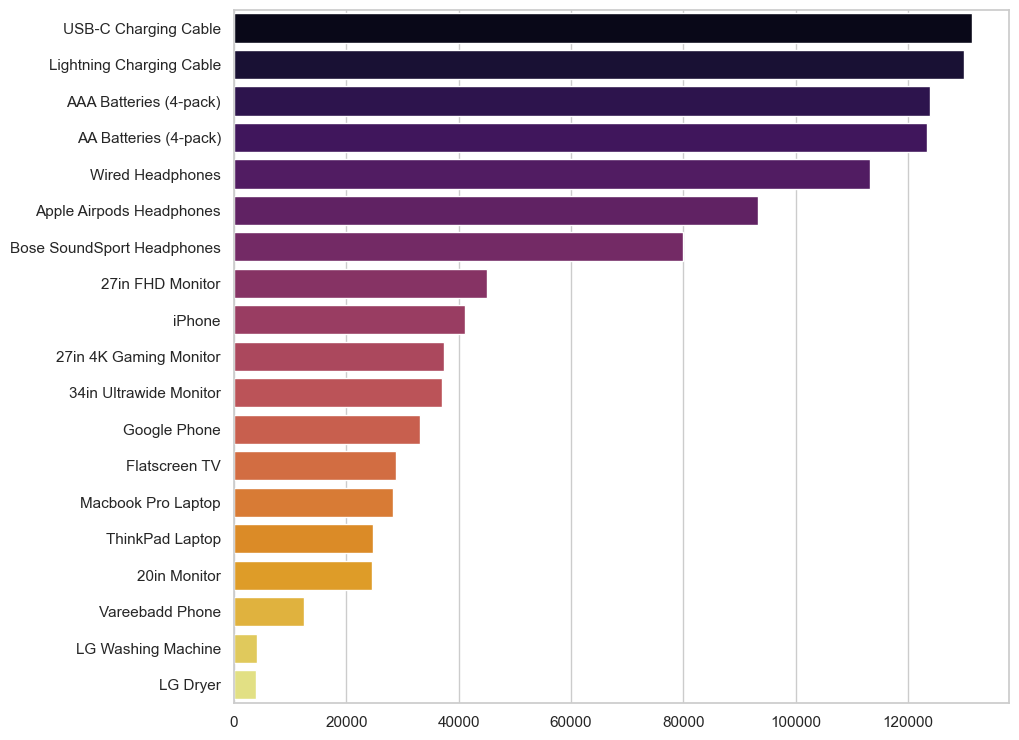

In [94]:
#Identying their favorite products
plt.rcParams["figure.figsize"] = [10,9]
sns.barplot(x= master_df.Product.value_counts().values , y= master_df.Product.value_counts().index, palette = 'inferno' )
plt.show()